<a href="https://colab.research.google.com/github/ChamathkaM2001/Production-Based-Energy-Prediction-for-Sustainable-Manufacturing/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('/content/import data.csv')

# Data Cleaning
df = df.drop_duplicates()
df = df.dropna()


In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['Total(Tonnage)', 'Total(Energy-Mixing)', 'Total(Packing)', 'Total(HVAC)', 'Total(Lightning)', 'Total(Air curtain)', 'Total(Dihimudity)']]
y = df['Actual Energy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [ ]:

print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

Random Forest - MSE: 33189.828699532445, R2: 0.9090021516322363


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for Random Forest
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Display the results
print("\nRandom Forest Metrics:")
print(f"MAPE: {rf_mape:.2f}%, MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}")




Random Forest Metrics:
MAPE: 4.36%, MAE: 67.3695, RMSE: 182.1808


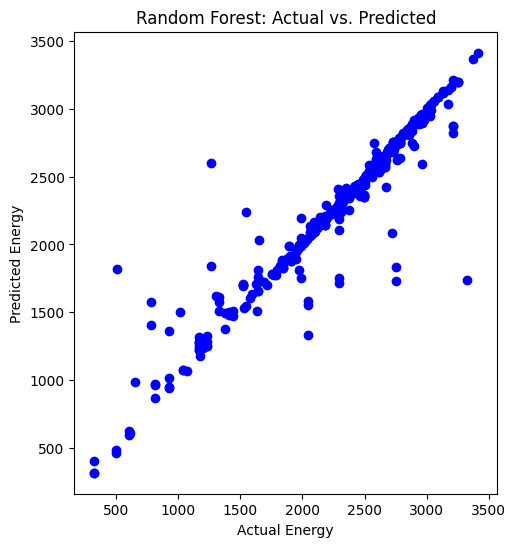

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, color='blue')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.show()

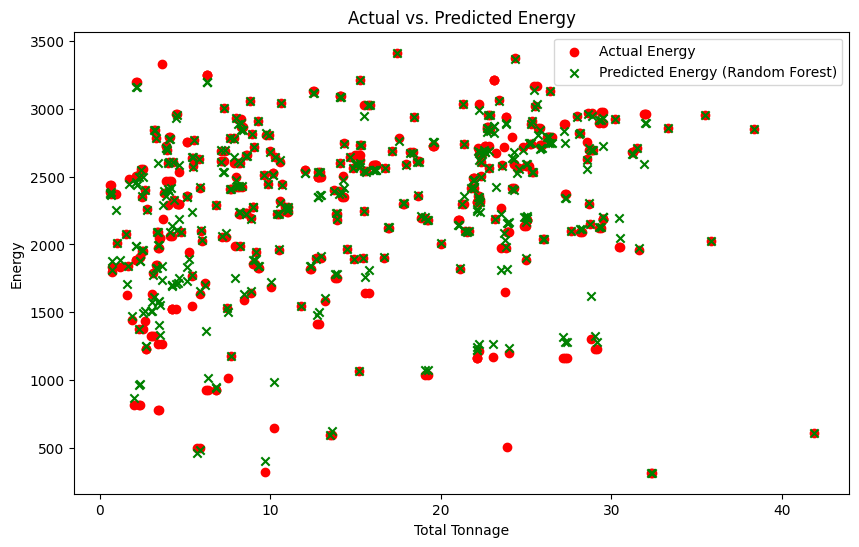

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for actual energy values
plt.scatter(X_test['Total(Tonnage)'], y_test, color='red', label='Actual Energy', marker='o')

# Scatter plot for predicted energy values (Random Forest)
plt.scatter(X_test['Total(Tonnage)'], rf_predictions, color='green', label='Predicted Energy (Random Forest)', marker='x')

plt.title('Actual vs. Predicted Energy')
plt.xlabel('Total Tonnage')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a random forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
best_rf_predictions = best_rf_model.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**AFTER HYPER- PARAMETER TUNNING**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, rf_predictions)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2: {r2:.2f}")
print(f"Adjusted R2: {adjusted_r2:.2f}")


MSE: 33189.83
MAE: 67.37
MAPE: 4.36%
R2: 0.91
Adjusted R2: 0.91


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have already loaded and preprocessed your data (X, y)
# Assuming you have trained a Random Forest model (rf_model)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('actual_vs_predicted_results.xlsx', index=False)

# Print a sample of the DataFrame
print(results_df.head())


      Actual  Predicted
1653    2587    2545.47
342     2123    2126.80
1343    2956    2951.20
765     2844    2842.74
865     2810    2810.35


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [ ]:
# Make predictions for all records
rf_predictions = rf_model.predict(X)

# Add the predicted energy column to the original DataFrame
df['Predicted Energy'] = rf_predictions

# Save the DataFrame to an Excel file
output_excel_path = '/content/actual_vs_predicted_results_all_records.xlsx'
df.to_excel(output_excel_path, index=False)

# Download the Excel file
from google.colab import files
files.download(output_excel_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

residual analysis

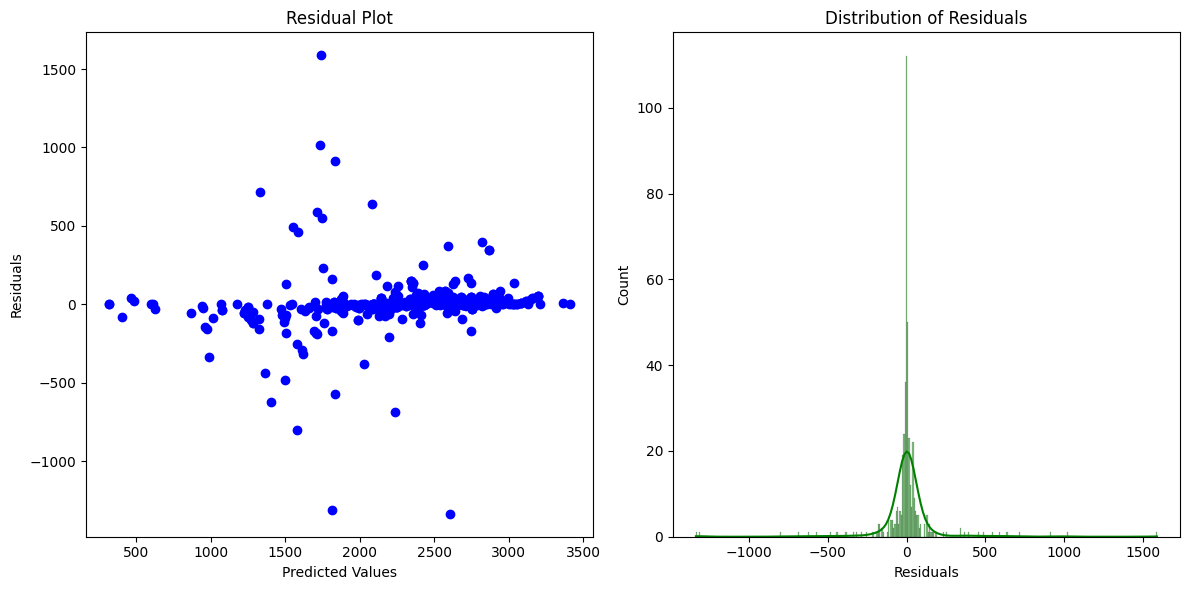

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for the test set
rf_predictions = rf_model.predict(X_test)

# Residual analysis
residuals = y_test.values - rf_predictions

# Residual plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(rf_predictions, residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

